# FAKE REVIEW NODE EMBEDDING

In [329]:
# importing all necessary libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import networkx as nx
import stellargraph as sg
from stellargraph import StellarGraph
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from node2vec import Node2Vec as n2v
sns.set()

%matplotlib inline

In [330]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import statistics
import math
import os
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
pd.set_option('max_colwidth', 800)


#importing Libraies
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import collections
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [331]:
#loading dataset
df=pd.read_csv('/content/newdataset.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [332]:
df.shape

(1470, 35)

In [333]:
d = []
for i in range(1470):
    s = i+1
    d.append(s)

In [334]:
d

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [335]:
df.insert(0, 'Index', d)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,No
2,3,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Yes
3,4,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,No
4,5,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,No


In [336]:
df.shape

(1470, 36)

In [337]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [338]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,792,35,Travel_Rarely,1204,Sales,4,3,Technical Degree,1,1100,...,80,0,9,2,3,8,7,4,7,Yes
1,1348,36,Travel_Frequently,1213,Human Resources,2,1,Human Resources,1,1890,...,80,0,10,2,2,10,1,0,8,No
2,318,52,Travel_Rarely,723,Research & Development,8,4,Medical,1,433,...,80,0,11,3,2,8,2,7,7,Yes
3,1324,28,Non-Travel,280,Human Resources,1,2,Life Sciences,1,1858,...,80,1,3,2,3,3,2,2,2,No
4,693,32,Travel_Rarely,498,Research & Development,3,4,Medical,1,966,...,80,1,8,2,4,8,7,6,3,No


In [339]:
df.isnull().sum()

Index                       0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d32bf3d10>,
      dtype=object)

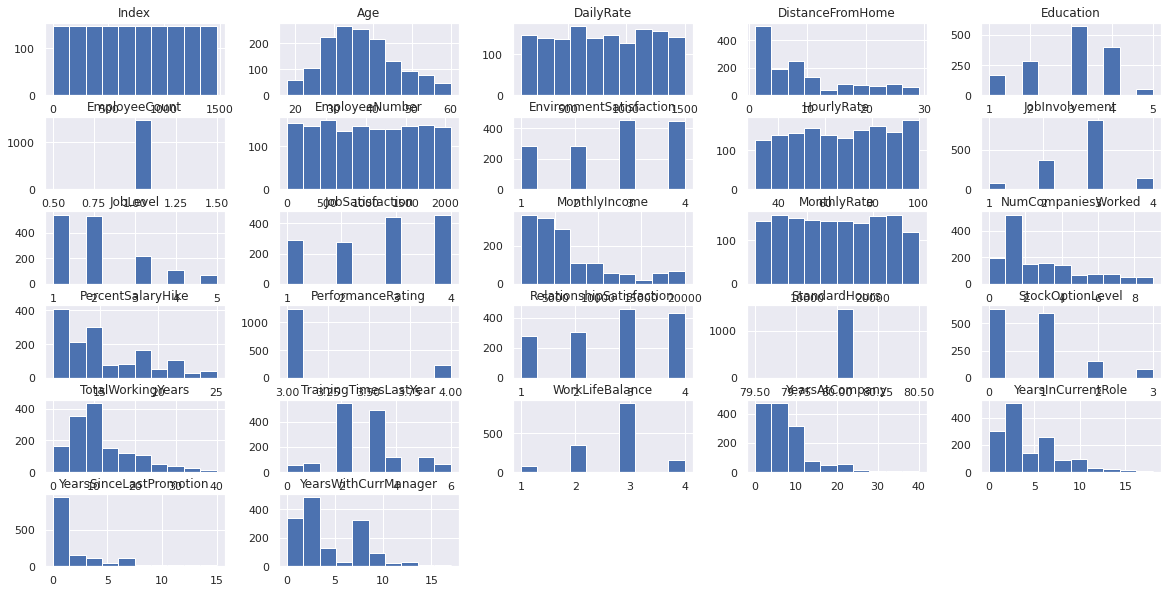

In [340]:
df.hist(figsize=(20,10))

In [341]:
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,792,35,Travel_Rarely,1204,Sales,4,3,Technical Degree,1,1100,...,80,0,9,2,3,8,7,4,7,Yes
1,1348,36,Travel_Frequently,1213,Human Resources,2,1,Human Resources,1,1890,...,80,0,10,2,2,10,1,0,8,No
2,318,52,Travel_Rarely,723,Research & Development,8,4,Medical,1,433,...,80,0,11,3,2,8,2,7,7,Yes
3,1324,28,Non-Travel,280,Human Resources,1,2,Life Sciences,1,1858,...,80,1,3,2,3,3,2,2,2,No
4,693,32,Travel_Rarely,498,Research & Development,3,4,Medical,1,966,...,80,1,8,2,4,8,7,6,3,No


In [342]:
feat_cat=[feature for feature in df.columns if df[feature].dtype =='O']
feat_cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Attrition']

In [343]:
ordinal_label=df['BusinessTravel'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}

In [344]:
df['BusinessTravel']=df['BusinessTravel'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,792,35,0,1204,Sales,4,3,Technical Degree,1,1100,...,80,0,9,2,3,8,7,4,7,Yes
1,1348,36,1,1213,Human Resources,2,1,Human Resources,1,1890,...,80,0,10,2,2,10,1,0,8,No
2,318,52,0,723,Research & Development,8,4,Medical,1,433,...,80,0,11,3,2,8,2,7,7,Yes
3,1324,28,2,280,Human Resources,1,2,Life Sciences,1,1858,...,80,1,3,2,3,3,2,2,2,No
4,693,32,0,498,Research & Development,3,4,Medical,1,966,...,80,1,8,2,4,8,7,6,3,No


In [345]:
ordinal_label=df['Department'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Research & Development': 0, 'Sales': 1, 'Human Resources': 2}

In [346]:
df['Department']=df['Department'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,792,35,0,1204,1,4,3,Technical Degree,1,1100,...,80,0,9,2,3,8,7,4,7,Yes
1,1348,36,1,1213,2,2,1,Human Resources,1,1890,...,80,0,10,2,2,10,1,0,8,No
2,318,52,0,723,0,8,4,Medical,1,433,...,80,0,11,3,2,8,2,7,7,Yes
3,1324,28,2,280,2,1,2,Life Sciences,1,1858,...,80,1,3,2,3,3,2,2,2,No
4,693,32,0,498,0,3,4,Medical,1,966,...,80,1,8,2,4,8,7,6,3,No


In [347]:
ordinal_label=df['EducationField'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Life Sciences': 0,
 'Medical': 1,
 'Marketing': 2,
 'Technical Degree': 3,
 'Other': 4,
 'Human Resources': 5}

In [348]:
df['EducationField']=df['EducationField'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,792,35,0,1204,1,4,3,3,1,1100,...,80,0,9,2,3,8,7,4,7,Yes
1,1348,36,1,1213,2,2,1,5,1,1890,...,80,0,10,2,2,10,1,0,8,No
2,318,52,0,723,0,8,4,1,1,433,...,80,0,11,3,2,8,2,7,7,Yes
3,1324,28,2,280,2,1,2,0,1,1858,...,80,1,3,2,3,3,2,2,2,No
4,693,32,0,498,0,3,4,1,1,966,...,80,1,8,2,4,8,7,6,3,No


In [349]:
ordinal_label=df['Gender'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Male': 0, 'Female': 1}

In [350]:
df['Gender']=df['Gender'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,792,35,0,1204,1,4,3,3,1,1100,...,80,0,9,2,3,8,7,4,7,Yes
1,1348,36,1,1213,2,2,1,5,1,1890,...,80,0,10,2,2,10,1,0,8,No
2,318,52,0,723,0,8,4,1,1,433,...,80,0,11,3,2,8,2,7,7,Yes
3,1324,28,2,280,2,1,2,0,1,1858,...,80,1,3,2,3,3,2,2,2,No
4,693,32,0,498,0,3,4,1,1,966,...,80,1,8,2,4,8,7,6,3,No


In [351]:
ordinal_label=df['JobRole'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Sales Executive': 0,
 'Research Scientist': 1,
 'Laboratory Technician': 2,
 'Manufacturing Director': 3,
 'Healthcare Representative': 4,
 'Manager': 5,
 'Sales Representative': 6,
 'Research Director': 7,
 'Human Resources': 8}

In [352]:
df['JobRole']=df['JobRole'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,792,35,0,1204,1,4,3,3,1,1100,...,80,0,9,2,3,8,7,4,7,Yes
1,1348,36,1,1213,2,2,1,5,1,1890,...,80,0,10,2,2,10,1,0,8,No
2,318,52,0,723,0,8,4,1,1,433,...,80,0,11,3,2,8,2,7,7,Yes
3,1324,28,2,280,2,1,2,0,1,1858,...,80,1,3,2,3,3,2,2,2,No
4,693,32,0,498,0,3,4,1,1,966,...,80,1,8,2,4,8,7,6,3,No


In [353]:
ordinal_label=df['MaritalStatus'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Married': 0, 'Single': 1, 'Divorced': 2}

In [354]:
df['MaritalStatus']=df['MaritalStatus'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,792,35,0,1204,1,4,3,3,1,1100,...,80,0,9,2,3,8,7,4,7,Yes
1,1348,36,1,1213,2,2,1,5,1,1890,...,80,0,10,2,2,10,1,0,8,No
2,318,52,0,723,0,8,4,1,1,433,...,80,0,11,3,2,8,2,7,7,Yes
3,1324,28,2,280,2,1,2,0,1,1858,...,80,1,3,2,3,3,2,2,2,No
4,693,32,0,498,0,3,4,1,1,966,...,80,1,8,2,4,8,7,6,3,No


In [355]:
ordinal_label=df['Over18'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Y': 0}

In [356]:
df['Over18']=df['Over18'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,792,35,0,1204,1,4,3,3,1,1100,...,80,0,9,2,3,8,7,4,7,Yes
1,1348,36,1,1213,2,2,1,5,1,1890,...,80,0,10,2,2,10,1,0,8,No
2,318,52,0,723,0,8,4,1,1,433,...,80,0,11,3,2,8,2,7,7,Yes
3,1324,28,2,280,2,1,2,0,1,1858,...,80,1,3,2,3,3,2,2,2,No
4,693,32,0,498,0,3,4,1,1,966,...,80,1,8,2,4,8,7,6,3,No


In [357]:
ordinal_label=df['OverTime'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'No': 0, 'Yes': 1}

In [358]:
df['OverTime']=df['OverTime'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,792,35,0,1204,1,4,3,3,1,1100,...,80,0,9,2,3,8,7,4,7,Yes
1,1348,36,1,1213,2,2,1,5,1,1890,...,80,0,10,2,2,10,1,0,8,No
2,318,52,0,723,0,8,4,1,1,433,...,80,0,11,3,2,8,2,7,7,Yes
3,1324,28,2,280,2,1,2,0,1,1858,...,80,1,3,2,3,3,2,2,2,No
4,693,32,0,498,0,3,4,1,1,966,...,80,1,8,2,4,8,7,6,3,No


In [359]:
ordinal_label=df['Attrition'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'No': 0, 'Yes': 1}

In [360]:
df['Attrition']=df['Attrition'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,792,35,0,1204,1,4,3,3,1,1100,...,80,0,9,2,3,8,7,4,7,1
1,1348,36,1,1213,2,2,1,5,1,1890,...,80,0,10,2,2,10,1,0,8,0
2,318,52,0,723,0,8,4,1,1,433,...,80,0,11,3,2,8,2,7,7,1
3,1324,28,2,280,2,1,2,0,1,1858,...,80,1,3,2,3,3,2,2,2,0
4,693,32,0,498,0,3,4,1,1,966,...,80,1,8,2,4,8,7,6,3,0


In [361]:
df1 = df.sort_values(by=['Index'], ascending=True)
df1.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1348,1,41,0,1102,1,1,2,0,1,1,...,80,0,8,0,1,6,4,0,5,1
157,2,49,1,279,0,8,1,0,1,2,...,80,1,10,3,3,10,7,1,7,0
1210,3,37,0,1373,0,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,1
360,4,33,1,1392,0,3,4,0,1,5,...,80,0,8,3,3,8,7,3,0,0
182,5,27,0,591,0,2,1,1,1,7,...,80,1,6,3,3,2,2,2,2,0


In [362]:
df1.reset_index(drop=True, inplace=True)

In [363]:
df1.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,0,1102,1,1,2,0,1,1,...,80,0,8,0,1,6,4,0,5,1
1,2,49,1,279,0,8,1,0,1,2,...,80,1,10,3,3,10,7,1,7,0
2,3,37,0,1373,0,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,1
3,4,33,1,1392,0,3,4,0,1,5,...,80,0,8,3,3,8,7,3,0,0
4,5,27,0,591,0,2,1,1,1,7,...,80,1,6,3,3,2,2,2,2,0


In [364]:
df1.reset_index(drop=True, inplace=True)

In [365]:
X = df1.drop(['Index', 'Attrition'], axis = 1)
Y = df1['Attrition']

In [366]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,1,1,2,0,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,0,8,1,0,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,0,1373,0,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,0,3,4,0,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,0,2,1,1,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [367]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score
import seaborn as sns

### CROSS VALIDATION

In [368]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
kf = KFold(n_splits=10)

In [369]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
scores = cross_val_score(lsvm, X, Y, cv=cv, n_jobs=-1)
print(np.mean(scores))

0.665986394557823


In [370]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
scores = cross_val_score(pa, X, Y, cv=cv, n_jobs=-1)
print(np.mean(scores))

0.7074829931972788


In [371]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000) 
scores = cross_val_score(log, X, Y, cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8687074829931973


In [372]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
scores = cross_val_score(rf, X, Y, cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8578231292517007


In [373]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
scores = cross_val_score(xgbc, X, Y, cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8687074829931973


### Baseline models

In [374]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

In [375]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
pa.fit(x_train, y_train)
y_pred=pa.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[170  77]
 [ 31  16]]
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       247
           1       0.17      0.34      0.23        47

    accuracy                           0.63       294
   macro avg       0.51      0.51      0.49       294
weighted avg       0.74      0.63      0.67       294

accuracy_score:  0.6326530612244898


In [376]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
lsvm.fit(x_train, y_train)
y_pred=lsvm.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[247   0]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

accuracy_score:  0.8401360544217688


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [377]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[246   1]
 [ 41   6]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.86      0.13      0.22        47

    accuracy                           0.86       294
   macro avg       0.86      0.56      0.57       294
weighted avg       0.86      0.86      0.81       294

accuracy_score:  0.8571428571428571


In [378]:
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
xgbc.fit(x_train, y_train)
y_pred=xgbc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[243   4]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.76      0.28      0.41        47

    accuracy                           0.87       294
   macro avg       0.82      0.63      0.67       294
weighted avg       0.86      0.87      0.84       294

accuracy_score:  0.8707482993197279


In [379]:
log = LogisticRegression(max_iter=10000) 
log.fit(x_train, y_train)
y_pred=log.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[241   6]
 [ 30  17]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.74      0.36      0.49        47

    accuracy                           0.88       294
   macro avg       0.81      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294

accuracy_score:  0.8775510204081632
